In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set initial values for error, integral, and derivative
error_x = 0
error_y = 0
integral_x = 0
integral_y = 0
derivative_x = 0
derivative_y = 0

# Set desired position
desired_x = 10.0
desired_y = 2.0

v_x = 0.0
v_y = 0.0
x = 0.0
y = 0.0

# Set PID gains
kp = .3
ki = 0.1
kd = 0.7

# Set time interval for control loop
dt = 0.1

previous_error_x = 0.0
previous_error_y = 0.0

track = []

# Start control loop
while True:
    # Measure current position and velocity
    current_x, current_y, current_vx, current_vy = (x,y,v_x,v_y)

    # Calculate error between desired and current position
    error_x = desired_x - current_x
    error_y = desired_y - current_y

    # Calculate integral of error
    integral_x += error_x * dt
    integral_y += error_y * dt

    # Calculate derivative of error
    derivative_x = (error_x - previous_error_x) / dt
    derivative_y = (error_y - previous_error_y) / dt

    # Calculate control output using PID equation
    control_x = kp * error_x + ki * integral_x + kd * derivative_x
    control_y = kp * error_y + ki * integral_y + kd * derivative_y

    # Send control output to system as acceleration
    v_x += control_x * dt
    v_y += control_y * dt
    x += v_x * dt
    y += v_y * dt

    # Check if desired point is reached and velocity is very small
    eps = 0.1
    if (abs(x - desired_x) < eps and abs(y - desired_y) < eps and abs(v_x) < eps and abs(v_y) < eps):
        break

    track.append([x, y ,v_x, v_y])

    # Update previous error for next iteration
    previous_error_x = error_x
    previous_error_y = error_y


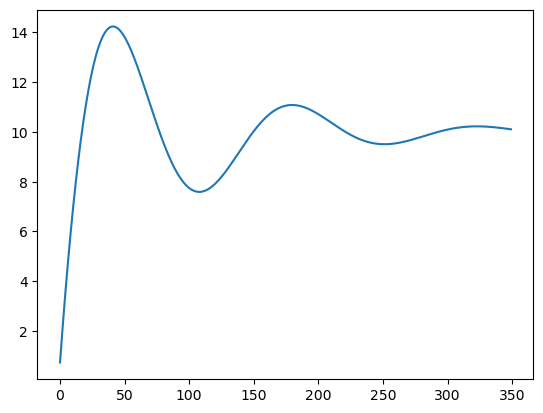

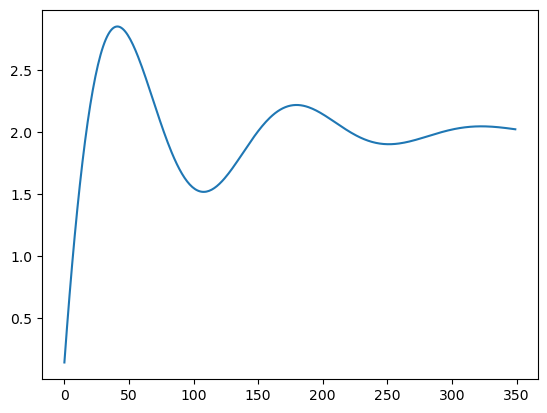

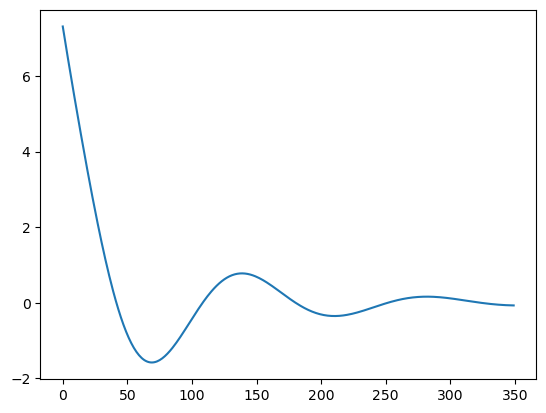

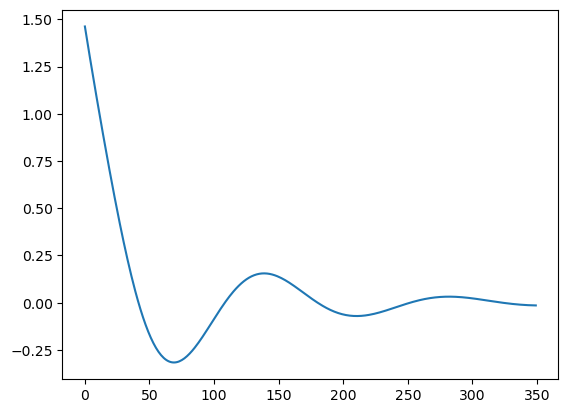

In [2]:
track = np.array(track)
plt.figure(1)
plt.plot(track[:,0])
plt.figure(2)
plt.plot(track[:,1])
plt.figure(3)
plt.plot(track[:,2])
plt.figure(4)
plt.plot(track[:,3])


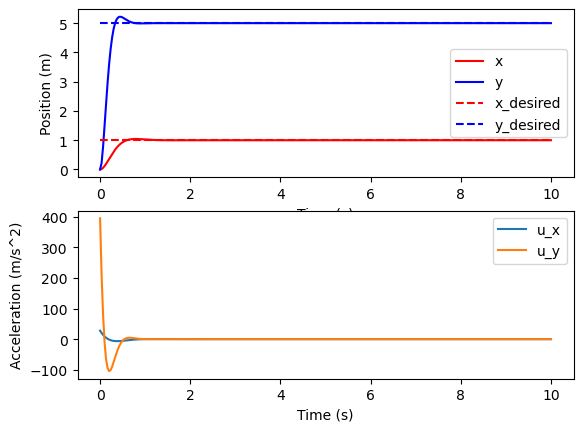

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Define the state space model
dt = 1/30.0  # Time step
A = np.array([[1, dt, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, dt],
              [0, 0, 0, 1]])
B = np.array([[dt**2/2, 0], 
              [dt, 0], 
              [0, dt**2/2], 
              [0, dt]])
C = np.eye(4)
D = np.zeros((4, 2))

# Set the desired state
x_desired = np.array([1, 0, 5, 0])

# Choose the cost function weights
Q = np.diag([1000, 0, 10000, 0])
R = np.eye(2)
K,S,E = control.dlqr(A,B,Q,R)

# Define the system dynamics
def dynamics(t, x):
    u = -K.dot(x - x_desired)
    x_dot = A.dot(x) + B.dot(u)
    return x_dot

# Simulate the system over time
t_final = 10
n_steps = int(t_final / dt) + 1
x_history = np.zeros((4, n_steps))
x_history[:, 0] = np.array([0, 0, 0, 0])

for i in range(1, n_steps):
    x_history[:, i] = A.dot(x_history[:, i-1]) + B.dot(-K.dot(x_history[:, i-1] - x_desired))

# Plot the results
t_span = np.arange(0, t_final+dt, dt)
plt.subplot(2, 1, 1)
plt.plot(t_span, x_history[0, :], 'r', label='x')
plt.plot(t_span, x_history[2, :], 'b', label='y')
plt.plot(t_span, [x_desired[0]]*n_steps, 'r--', label='x_desired')
plt.plot(t_span, [x_desired[2]]*n_steps, 'b--', label='y_desired')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_span, -K.dot(x_history - x_desired.reshape(4,1)).T)
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend(['u_x', 'u_y'])

plt.show()


In [11]:
print(K)

[[ 2.76999152e+01  7.44310623e+00  1.47356448e-14  2.09301326e-16]
 [-1.55936992e-14 -2.96187741e-16  7.90444340e+01  1.25733396e+01]]


In [8]:
print(f"""
auto ux = -{K[0,0]} * (pos.x - track_point.x) - {K[0,1]} * (vel.x - track_vel.x);
auto uy = -{K[1,2]} * (pos.y - track_point.y) - {K[1,3]} * (vel.y - track_vel.y);""")


auto ux = -9.281904356550083 * (pos.x - track_point.x) - 4.3085738606991475 * (vel.x - track_vel.x);
auto uy = -79.04443404078475 * (pos.y - track_point.y) - 12.573339575529225 * (vel.y - track_vel.y);
